# One-way ANOVA

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

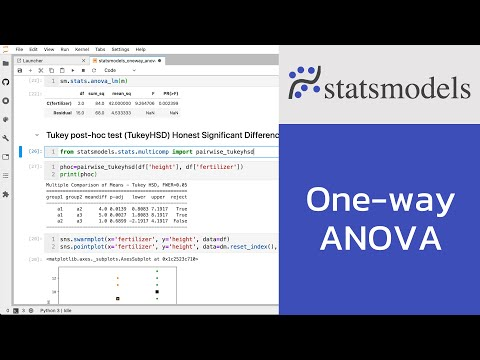

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('8SXnfq8RJsU', width=720, height=405)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
print(f'pandas     version: {pd.__version__}')
print(f'seaborn    version: {sns.__version__}')
print(f'statmodels version: {sm.__version__}')

pandas     version: 1.0.0
seaborn    version: 0.9.0
statmodels version: 0.11.0


In [5]:
pd.Timestamp.now()

Timestamp('2020-02-01 07:23:40.381665')

## read data (fertilizer on plant growth)
data source: https://en.wikipedia.org/wiki/One-way_analysis_of_variance#Analysis_summary

In [6]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/anova_one_way_wide_format.csv'
df=pd.read_csv(url)
df

,a1,a2,a3
0,6,8,13
1,8,12,9
2,4,9,11
3,5,11,8
4,3,6,7
5,4,8,12


In [7]:
df=df.melt(var_name='fertilizer', value_name='height')
df

,fertilizer,height
0,a1,6
1,a1,8
2,a1,4
3,a1,5
4,a1,3
5,a1,4
6,a2,8
7,a2,12
8,a2,9
9,a2,11


In [8]:
df.describe()

,height
count,18.00000
mean,8.00000
std,2.99018
min,3.00000
25%,6.00000
50%,8.00000
75%,10.50000
max,13.00000


In [9]:
df.groupby('fertilizer').describe()

height                                              
            count  mean       std  min   25%   50%    75%   max
fertilizer                                                     
a1            6.0   5.0  1.788854  3.0  4.00   4.5   5.75   8.0
a2            6.0   9.0  2.190890  6.0  8.00   8.5  10.50  12.0
a3            6.0  10.0  2.366432  7.0  8.25  10.0  11.75  13.0

In [10]:
dm=df.groupby('fertilizer').mean()
dm

,height
fertilizer,
a1,5
a2,9
a3,10


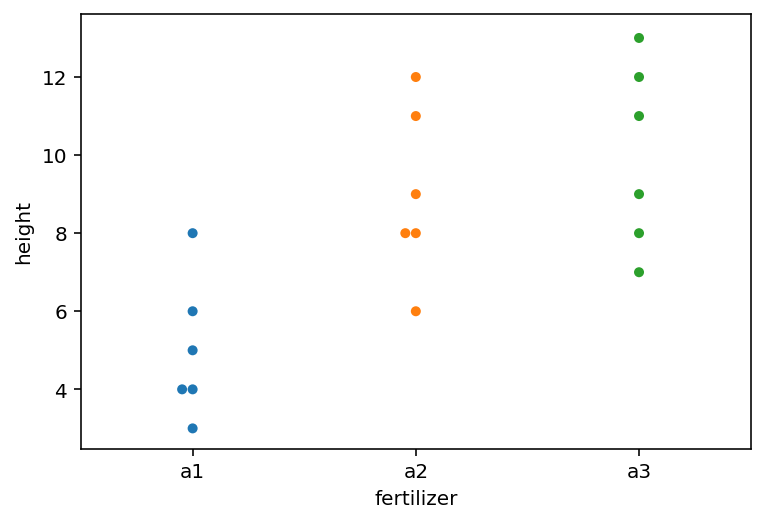

In [11]:
sns.swarmplot(x='fertilizer', y='height', data=df)

In [12]:
dm.reset_index()

,fertilizer,height
0,a1,5
1,a2,9
2,a3,10


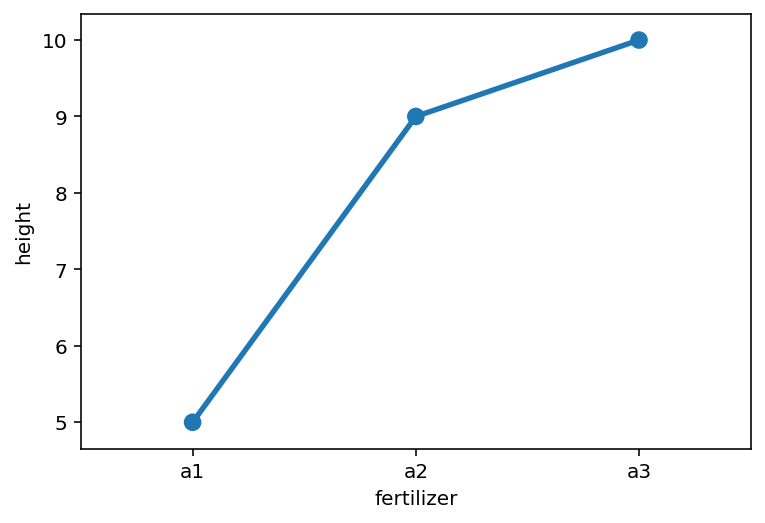

In [13]:
sns.pointplot(x='fertilizer', y='height', data=dm.reset_index())

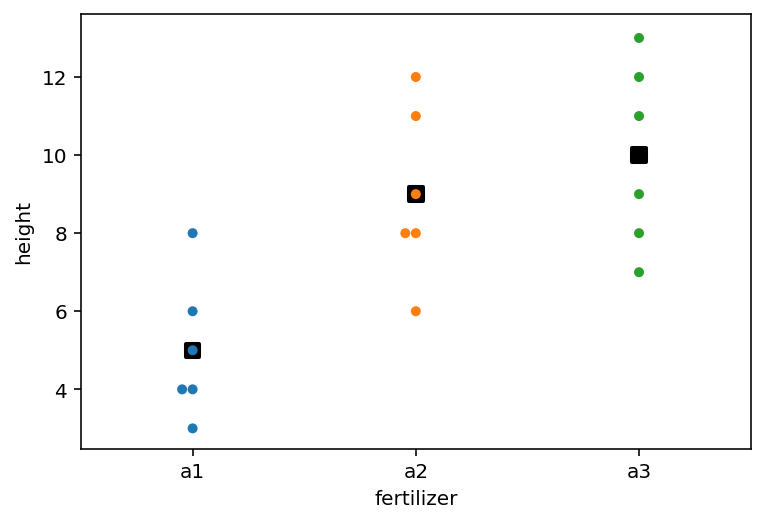

In [14]:
sns.swarmplot(x='fertilizer', y='height', data=df)
sns.pointplot(x='fertilizer', y='height', data=dm.reset_index(), join=False, markers='s', color='black')

## ANOVA

In [15]:
m=smf.ols(formula='height ~ C(fertilizer)', data=df).fit()
m.summary()

/Users/prasert/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9.265
Date:                Sat, 01 Feb 2020   Prob (F-statistic):            0.00240
Time:                        07:23:43   Log-Likelihood:                -37.503
No. Observations:                  18   AIC:                             81.01
Df Residuals:                      15   BIC:                             83.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.0000      0.869      5.752      0.000       3.147       6.853
C(fertilizer)[T.a2]     4.0000      1.229      3.254      0.005       1.380       6.620
C(fertilizer)[T.a3]     5.0000      1.229      4.067      0.001       2.380       7.620
==============================================================================
Omnibus:                        2.111   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.086
Skew:                           0.182   Prob(JB):                        0.581
Kurtosis:                       1.853   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Hypothesis
$$H_0: \mu_{a1} = \mu_{a2} = \mu_{a3}$$
$$H_1: \text{not all means are equal}$$

In [16]:
sm.stats.anova_lm(m)

,df,sum_sq,mean_sq,F,PR(>F)
C(fertilizer),2.0,84.0,42.000000,9.264706,0.002399
Residual,15.0,68.0,4.533333,NaN,NaN


## Tukey Honest Significant Differences (TukeyHSD)

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
phoc=pairwise_tukeyhsd(df['height'], df['fertilizer'])
print(phoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    a1     a2      4.0 0.0139  0.8083 7.1917   True
    a1     a3      5.0 0.0027  1.8083 8.1917   True
    a2     a3      1.0 0.6899 -2.1917 4.1917  False
---------------------------------------------------


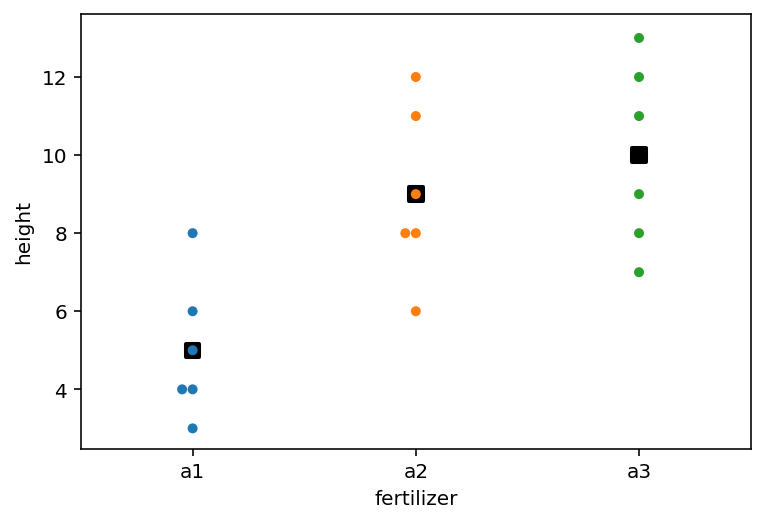

In [19]:
sns.swarmplot(x='fertilizer', y='height', data=df)
sns.pointplot(x='fertilizer', y='height', data=dm.reset_index(), join=False, markers='s', color='black')